# Ensemble Learning - Project

#### by Sachin Sharma

## Import the necessary libraries

In [1]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    

import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

## Read the data as a data frame 

In [2]:
cDataOrg = pd.read_csv("bank-full.csv")
cDataOrg.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Shape of the data 

In [3]:
cDataOrg.shape

(45211, 17)

###  Data type of each attribute

In [4]:
cDataOrg.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

### Checking the presence of missing values 

In [5]:
cDataOrg.isnull().values.any()

False

### 5 Point summary of numerical attributes 

In [6]:
cDataOrg.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [7]:
cDataOrg.mode()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,32,blue-collar,married,secondary,no,0,yes,no,cellular,20,may,124,1,-1,0,unknown,no


### Checking the presence of outliers

In [8]:
outliers = cDataOrg[cDataOrg['age'] > cDataOrg['age'].mean() + 3 * cDataOrg['age'].std()]
outliers

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
29158,83,retired,married,primary,no,425,no,no,telephone,2,feb,912,1,-1,0,unknown,no
29261,75,retired,divorced,primary,no,46,no,no,cellular,2,feb,294,1,-1,0,unknown,no
29263,75,retired,married,primary,no,3324,no,no,cellular,2,feb,149,1,-1,0,unknown,no
29322,83,retired,married,tertiary,no,6236,no,no,cellular,2,feb,283,2,-1,0,unknown,no
29865,75,retired,divorced,primary,no,3881,yes,no,cellular,4,feb,136,3,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45109,78,management,married,unknown,no,1780,yes,no,cellular,25,oct,211,2,185,7,success,yes
45118,78,retired,married,primary,no,14204,no,no,cellular,26,oct,150,1,183,1,other,no
45141,77,unknown,married,unknown,no,397,no,no,telephone,8,nov,207,1,185,3,success,no
45191,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,yes


In [9]:
outliers = cDataOrg[cDataOrg['balance'] > cDataOrg['balance'].mean() + 3 * cDataOrg['balance'].std()]
outliers

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
34,51,management,married,tertiary,no,10635,yes,no,unknown,5,may,336,1,-1,0,unknown,no
69,35,blue-collar,single,secondary,no,12223,yes,yes,unknown,5,may,177,1,-1,0,unknown,no
334,45,management,divorced,tertiary,no,24598,yes,no,unknown,5,may,313,3,-1,0,unknown,no
446,39,technician,single,unknown,no,45248,yes,no,unknown,6,may,1623,1,-1,0,unknown,yes
920,44,admin.,married,secondary,no,58544,yes,no,unknown,7,may,144,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45075,28,technician,single,tertiary,no,11862,no,no,cellular,21,oct,549,2,238,13,other,yes
45097,61,self-employed,married,tertiary,no,10861,no,no,cellular,25,oct,225,1,91,5,success,yes
45098,44,technician,single,unknown,no,11115,no,no,cellular,25,oct,189,1,185,4,success,no
45118,78,retired,married,primary,no,14204,no,no,cellular,26,oct,150,1,183,1,other,no


In [10]:
outliers = cDataOrg[cDataOrg['duration'] > cDataOrg['duration'].mean() + 3 * cDataOrg['duration'].std()]
outliers

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,no
43,54,retired,married,secondary,no,529,yes,no,unknown,5,may,1492,1,-1,0,unknown,no
59,46,services,married,primary,no,179,yes,no,unknown,5,may,1778,1,-1,0,unknown,no
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45031,42,unemployed,married,secondary,no,1289,no,no,cellular,15,oct,1176,3,92,6,success,yes
45072,54,management,divorced,tertiary,no,5475,no,no,cellular,21,oct,1032,1,91,4,success,yes
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45200,38,technician,married,secondary,no,557,yes,no,cellular,16,nov,1556,4,-1,0,unknown,yes


In [11]:
outliers = cDataOrg[cDataOrg['day'] > cDataOrg['day'].mean() + 3 * cDataOrg['day'].std()]
outliers

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target


In [12]:
outliers = cDataOrg[cDataOrg['campaign'] > cDataOrg['campaign'].mean() + 3 * cDataOrg['campaign'].std()]
outliers

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
2626,31,technician,married,secondary,no,106,yes,no,unknown,13,may,101,13,-1,0,unknown,no
2706,46,admin.,divorced,tertiary,no,3749,yes,no,unknown,13,may,69,19,-1,0,unknown,no
2967,37,technician,married,tertiary,yes,0,yes,no,unknown,14,may,93,14,-1,0,unknown,no
3044,51,unemployed,married,secondary,no,425,yes,no,unknown,14,may,286,14,-1,0,unknown,no
3079,28,blue-collar,married,primary,no,0,no,no,unknown,14,may,17,24,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38767,28,admin.,married,secondary,no,788,yes,no,cellular,18,may,11,14,-1,0,unknown,no
40336,57,entrepreneur,married,tertiary,no,0,no,no,telephone,18,jun,390,15,-1,0,unknown,no
41380,43,unemployed,married,unknown,no,970,yes,no,telephone,1,sep,513,13,288,11,failure,no
42315,62,technician,married,secondary,no,135,yes,no,telephone,16,nov,446,13,96,1,other,no


In [13]:
outliers = cDataOrg[cDataOrg['pdays'] > cDataOrg['pdays'].mean() + 3 * cDataOrg['pdays'].std()]
outliers

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
32111,32,services,married,secondary,no,1129,yes,no,cellular,15,apr,903,2,341,2,failure,yes
32147,41,blue-collar,married,secondary,no,217,yes,no,cellular,15,apr,375,2,344,1,failure,no
32230,33,management,single,secondary,no,-665,yes,yes,cellular,16,apr,324,1,342,1,failure,no
32234,31,technician,single,tertiary,no,2530,yes,no,cellular,16,apr,60,1,342,1,failure,no
32252,30,management,single,tertiary,no,726,yes,no,cellular,16,apr,39,1,342,3,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45166,41,unemployed,single,tertiary,no,79,no,no,telephone,9,nov,394,1,390,2,success,yes
45171,33,admin.,single,secondary,no,690,no,no,cellular,10,nov,223,3,555,16,failure,no
45177,36,admin.,divorced,secondary,no,1224,yes,no,cellular,12,nov,482,1,374,1,success,yes
45188,29,management,single,secondary,no,703,yes,no,cellular,16,nov,236,1,550,2,success,yes


In [14]:
outliers = cDataOrg[cDataOrg['previous'] > cDataOrg['previous'].mean() + 3 * cDataOrg['previous'].std()]
outliers

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
24136,34,management,married,tertiary,no,1770,yes,no,unknown,6,nov,26,1,101,11,other,no
24295,35,technician,divorced,tertiary,no,1718,yes,yes,cellular,17,nov,74,1,167,16,other,no
24331,36,management,married,tertiary,no,5057,yes,no,cellular,17,nov,70,1,166,10,failure,no
24506,42,unemployed,married,unknown,no,970,yes,no,telephone,17,nov,725,1,119,10,success,no
24556,44,management,married,tertiary,no,1451,yes,no,cellular,17,nov,157,3,150,12,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45171,33,admin.,single,secondary,no,690,no,no,cellular,10,nov,223,3,555,16,failure,no
45172,30,technician,single,tertiary,no,2325,no,no,cellular,10,nov,134,1,92,8,success,no
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes


## Prepare the Data to train a model

In [15]:
# We have seen that there are no missing values but we have object datatypes,
# which need to be converted to categorical values.

cData = cDataOrg.copy()

for feature in cData.columns: # Loop through all columns in the dataframe
    if cData[feature].dtype == 'object': # Only apply for columns with categorical strings
        cData[feature] = pd.Categorical(cData[feature]).codes # Replace strings with an integer

cData.dtypes

age          int64
job           int8
marital       int8
education     int8
default       int8
balance      int64
housing       int8
loan          int8
contact       int8
day          int64
month         int8
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome      int8
Target        int8
dtype: object

In [16]:
dt_x = cData.copy()
dt_y = dt_x.pop("Target")

train_set, test_set, train_labels, test_labels = train_test_split(dt_x, dt_y, test_size=.30, random_state=1)

## Train a few standard classification algorithms, note and comment on their performances across different classification metrics.

### Logistic Regression

In [17]:
log_train_set = train_set.copy()
log_test_set = test_set.copy()
log_train_labels = train_labels.copy()
log_test_labels = test_labels.copy()

In [18]:
logistic_model = LogisticRegression(solver="liblinear")
logistic_model = logistic_model.fit(log_train_set, log_train_labels)

y_log_predict = logistic_model.predict(log_test_set)


print(logistic_model.score(log_test_set , log_test_labels))

print(metrics.confusion_matrix(log_test_labels, y_log_predict))

0.8909613683279268
[[11761   252]
 [ 1227   324]]


### K-NN

In [19]:
knn_x = cData.copy()
knn_y = knn_x.pop("Target")
XScaled  = knn_x.apply(zscore) 

knn_train_set, knn_test_set, knn_train_labels, knn_test_labels = train_test_split(XScaled, knn_y, test_size=.30, random_state=1)

In [20]:
knn_model = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
knn_model = knn_model.fit(knn_train_set, knn_train_labels)

y_knn_predict = knn_model.predict(knn_test_set)


print(logistic_model.score(knn_test_set , knn_test_labels))

print(metrics.confusion_matrix(knn_test_labels, y_knn_predict))

0.885579475081097
[[11651   362]
 [ 1016   535]]


 ### Naïve Bayes

In [21]:
nb_train_set = train_set.copy()
nb_test_set = test_set.copy()
nb_train_labels = train_labels.copy()
nb_test_labels = test_labels.copy()

In [22]:
GaussianNB_model = GaussianNB()
GaussianNB_model = GaussianNB_model.fit(nb_train_set, nb_train_labels)

y_nb_predict = GaussianNB_model.predict(nb_test_set)

print(logistic_model.score(nb_test_set , nb_test_labels))

print(metrics.confusion_matrix(nb_test_labels, y_nb_predict))

0.8909613683279268
[[10707  1306]
 [  850   701]]


 ## Build the ensemble models and compare the results with the base models. 

In [23]:
col_labels = [ 'age', 'job' ,'marital' , 'education', 'default' , 'balance'
, 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 
'pdays', 'previous', 'poutcome', 'Target']

In [24]:
train_char_label = ['no', 'yes']

### Decision Tree Classification

#### Entropy

In [25]:
dt_entropy_model = DecisionTreeClassifier(criterion = 'entropy')

In [26]:
dt_train_set = train_set.copy()
dt_test_set = test_set.copy()
dt_train_labels = train_labels.copy()
dt_test_labels = test_labels.copy()

dt_entropy_model = dt_entropy_model.fit(dt_train_set, dt_train_labels)

In [27]:
y_entropy_predict = dt_entropy_model.predict(dt_test_set)

In [28]:
print(dt_entropy_model.score(dt_test_set , dt_test_labels))

print(metrics.confusion_matrix(dt_test_labels, y_entropy_predict))

0.8757741079327632
[[11129   884]
 [  801   750]]


#### Gini

In [29]:
dt_gini_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)

In [30]:
x_train_gini = dt_train_set.copy()
x_test_gini = dt_test_set.copy()
y_train_gini = dt_train_labels.copy()
y_test_gini = dt_test_labels.copy()

dt_gini_model = dt_gini_model.fit(x_train_gini, y_train_gini)

In [31]:
y_gini_predict = dt_gini_model.predict(x_test_gini)

In [32]:
print(dt_gini_model.score(x_test_gini, y_test_gini))

print(metrics.confusion_matrix(y_test_gini, y_gini_predict))

0.8716455322913594
[[11115   898]
 [  843   708]]


### Bagging

In [33]:
bag_model = BaggingClassifier(n_estimators = 50)

In [34]:
x_train_bag = x_train_gini.copy()
x_test_bag = x_test_gini.copy()
y_train_bag = y_train_gini.copy()
y_test_bag = y_test_gini.copy()

bag_model = bag_model.fit(x_train_bag, y_train_bag)

In [35]:
y_bag_predict = bag_model.predict(x_test_bag)

In [36]:
print(bag_model.score(x_test_bag , y_test_bag))

print(metrics.confusion_matrix(y_test_bag, y_bag_predict))

0.9031996461220879
[[11524   489]
 [  824   727]]


### GradientBoost

In [37]:
gb_model = GradientBoostingClassifier(n_estimators = 50)

In [38]:
x_train_gb = x_train_gini.copy()
x_test_gb = x_test_gini.copy()
y_train_gb = y_train_gini.copy()
y_test_gb = y_test_gini.copy()

gb_model = gb_model.fit(x_train_gb, y_train_gb)

In [39]:
y_gb_predict = gb_model.predict(x_test_gb)

print(gb_model.score(x_test_gb , y_test_gb))
print(metrics.confusion_matrix(y_test_gb, y_gb_predict))

0.9004718372161604
[[11716   297]
 [ 1053   498]]


### AdaBoosting

In [40]:
ab_model = AdaBoostClassifier(n_estimators=50)

In [41]:
x_train_ab = x_train_gini.copy()
x_test_ab = x_test_gini.copy()
y_train_ab = y_train_gini.copy()
y_test_ab = y_test_gini.copy()

ab_model = ab_model.fit(x_train_ab, y_train_ab)

In [42]:
y_ab_predict = ab_model.predict(x_test_ab)

print(ab_model.score(x_test_ab , y_test_ab))
print(metrics.confusion_matrix(y_test_ab, y_ab_predict))

0.8984812739604836
[[11673   340]
 [ 1037   514]]


 ### RandomForest Classifier

In [43]:
rf_model = RandomForestClassifier(n_estimators = 50)

In [44]:
x_train_rf = x_train_gini.copy()
x_test_rf = x_test_gini.copy()
y_train_rf = y_train_gini.copy()
y_test_rf = y_test_gini.copy()

rf_model = rf_model.fit(x_train_rf, y_train_rf)

In [45]:
y_rf_predict = rf_model.predict(x_test_rf)

print(rf_model.score(x_test_rf , y_test_rf))
print(metrics.confusion_matrix(y_test_rf, y_rf_predict))

0.9069595989383663
[[11643   370]
 [  892   659]]


## Compare performances of all the models

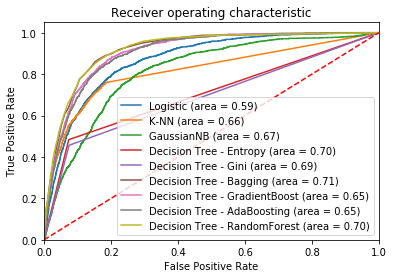

In [47]:
plt.figure()

log_roc_auc = roc_auc_score(log_test_labels, logistic_model.predict(log_test_set))
fpr, tpr, thresholds = metrics.roc_curve(log_test_labels, logistic_model.predict_proba(log_test_set)[:,1])
plt.plot(fpr, tpr, label='Logistic (area = %0.2f)' % log_roc_auc)

knn_roc_auc = roc_auc_score(knn_test_labels, knn_model.predict(knn_test_set))
fpr, tpr, thresholds = metrics.roc_curve(knn_test_labels, knn_model.predict_proba(knn_test_set)[:,1])
plt.plot(fpr, tpr, label='K-NN (area = %0.2f)' % knn_roc_auc)

nb_roc_auc = roc_auc_score(nb_test_labels, GaussianNB_model.predict(nb_test_set))
fpr, tpr, thresholds = metrics.roc_curve(nb_test_labels, GaussianNB_model.predict_proba(nb_test_set)[:,1])
plt.plot(fpr, tpr, label='GaussianNB (area = %0.2f)' % nb_roc_auc)

entropy_roc_auc = roc_auc_score(dt_test_labels, dt_entropy_model.predict(dt_test_set))
fpr, tpr, thresholds = metrics.roc_curve(dt_test_labels, dt_entropy_model.predict_proba(dt_test_set)[:,1])
plt.plot(fpr, tpr, label='Decision Tree - Entropy (area = %0.2f)' % entropy_roc_auc)

gini_roc_auc = roc_auc_score(dt_test_labels, dt_gini_model.predict(dt_test_set))
fpr, tpr, thresholds = metrics.roc_curve(dt_test_labels, dt_gini_model.predict_proba(dt_test_set)[:,1])
plt.plot(fpr, tpr, label='Decision Tree - Gini (area = %0.2f)' % gini_roc_auc)

bag_roc_auc = roc_auc_score(dt_test_labels, bag_model.predict(dt_test_set))
fpr, tpr, thresholds = metrics.roc_curve(dt_test_labels, bag_model.predict_proba(dt_test_set)[:,1])
plt.plot(fpr, tpr, label='Decision Tree - Bagging (area = %0.2f)' % bag_roc_auc)

gb_roc_auc = roc_auc_score(dt_test_labels, gb_model.predict(dt_test_set))
fpr, tpr, thresholds = metrics.roc_curve(dt_test_labels, gb_model.predict_proba(dt_test_set)[:,1])
plt.plot(fpr, tpr, label='Decision Tree - GradientBoost (area = %0.2f)' % gb_roc_auc)

ab_roc_auc = roc_auc_score(dt_test_labels, ab_model.predict(dt_test_set))
fpr, tpr, thresholds = metrics.roc_curve(dt_test_labels, ab_model.predict_proba(dt_test_set)[:,1])
plt.plot(fpr, tpr, label='Decision Tree - AdaBoosting (area = %0.2f)' % ab_roc_auc)

rf_roc_auc = roc_auc_score(dt_test_labels, rf_model.predict(dt_test_set))
fpr, tpr, thresholds = metrics.roc_curve(dt_test_labels, rf_model.predict_proba(dt_test_set)[:,1])
plt.plot(fpr, tpr, label='Decision Tree - RandomForest (area = %0.2f)' % rf_roc_auc)


plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Ensenble Model Comparison')
plt.show()

##### ROC curve shows better coverage for Bagging (AUC) than others - by this we can conclude that Bagging  performed better.